In [2]:
# module importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# data reading and first view
path = "E://Data Science//amlabetter//Capstone Projects//EDA//Airbnb NYC 2019.csv"
airbnb_df = pd.read_csv(path)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
airbnb_df.shape

(48895, 16)

In [6]:
# Looking for null values
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# columns in the dataframe
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
# Data summary
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
# function for calculating percentage of null values in eaach columns
def null_percentage_calulator(df):
    ''' it takes DataFrame and returns percentage of null values in each columns as a dictionary'''
    null_col_dict = {col:len(airbnb_df[airbnb_df[col].isnull() == True ]) for col in airbnb_df.columns}
    return {i[0] : round((i[1]*100)/len(airbnb_df),2) for i in null_col_dict.items()}

# checking null values using above function
null_percentage_calulator(airbnb_df)

{'id': 0.0,
 'name': 0.03,
 'host_id': 0.0,
 'host_name': 0.04,
 'neighbourhood_group': 0.0,
 'neighbourhood': 0.0,
 'latitude': 0.0,
 'longitude': 0.0,
 'room_type': 0.0,
 'price': 0.0,
 'minimum_nights': 0.0,
 'number_of_reviews': 0.0,
 'last_review': 20.56,
 'reviews_per_month': 20.56,
 'calculated_host_listings_count': 0.0,
 'availability_365': 0.0}

In [10]:
# Number of unique hosts, neighbourhood_groups and room type before dropping null columns
print("number of unique hosts :",len(airbnb_df['host_id'].unique()))
print("number of unique listings :",len(airbnb_df['name'].unique()))
print("number of unique neighbourhoods : ",len(airbnb_df['neighbourhood'].unique()))
print("number of unique neighbourhood_group :",len(airbnb_df['neighbourhood_group'].unique()),airbnb_df['neighbourhood_group'].unique())
print("number of unique room type :",len(airbnb_df['room_type'].unique()),airbnb_df['room_type'].unique())

number of unique hosts : 37457
number of unique listings : 47906
number of unique neighbourhoods :  221
number of unique neighbourhood_group : 5 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
number of unique room type : 3 ['Private room' 'Entire home/apt' 'Shared room']


<h3>There are 3% null values in "name" and 4% in "host_name" columns I think dropping 3-4% of data will not affect much</h3>

In [11]:
# dropping null values from name and host_name columns
airbnb_df.dropna(subset = ['name','host_name'], axis = 0, inplace = True)
airbnb_df.shape

(48858, 16)

In [12]:
# Number of unique hosts, neighbourhood_groups and room type after dropping null columns
print("number of unique hosts :",len(airbnb_df['host_id'].unique()))
print("number of unique listings :",len(airbnb_df['name'].unique()))
print("number of unique neighbourhoods : ",len(airbnb_df['neighbourhood'].unique()))
print("number of unique neighbourhood_group :",len(airbnb_df['neighbourhood_group'].unique()),airbnb_df['neighbourhood_group'].unique())
print("number of unique room type :",len(airbnb_df['room_type'].unique()),airbnb_df['room_type'].unique())

# number of unique hosts  before dropping the null values : 37457

number of unique hosts : 37425
number of unique listings : 47884
number of unique neighbourhoods :  221
number of unique neighbourhood_group : 5 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
number of unique room type : 3 ['Private room' 'Entire home/apt' 'Shared room']


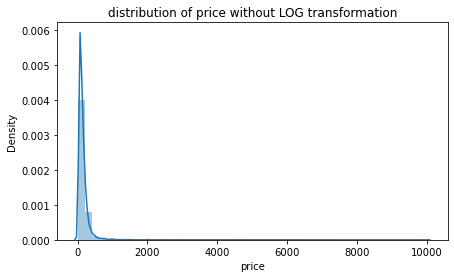

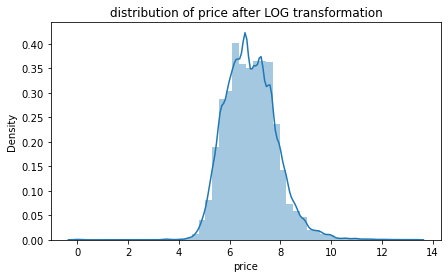

In [22]:
plt.rcParams['figure.figsize'] = (7,4)
# sns.distplot(np.log2(airbnb_df['price']+1))
sns.distplot(airbnb_df['price'])
plt.title('distribution of price without LOG transformation')
plt.show()
plt.rcParams['figure.figsize'] = (7,4)
sns.distplot(np.log2(airbnb_df['price']+1))
# sns.distplot(airbnb_df['price'])
plt.title('distribution of price after LOG transformation')
plt.show()

<h3>
    Name and Host_ID for Top five unique hosts
</h3>

In [14]:
# Function for extracting top five hosts
def top_5_unique(df):
    ''' Takes a dataframe and returns top five observations according to calculated_host_listings_counts columns '''
    top_5_hosts = list(airbnb_df['host_id'].value_counts(ascending=False).head())
    result_df = pd.DataFrame(columns=df.columns)
    for i in top_5_hosts:
        result_df = result_df.append(df[ df['calculated_host_listings_count'] == i].head(1))
    return result_df

print('These are top five hosts')
top_5_unique(airbnb_df)[['host_id','host_name']]

These are top five hosts


,host_id,host_name
38293,219517861,Sonder (NYC)
26137,107434423,Blueground
9740,30283594,Kara
32718,137358866,Kazuya
5093,16098958,Jeremy & Laura


In [15]:
# average price per neighbourhood and room type
avg_neighbourhood_room_type = airbnb_df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().round(2)
print("Average price per neighbourhood for each type of rooms")
avg_neighbourhood_room_type

Average price per neighbourhood for each type of rooms


neighbourhood_group  room_type      
Bronx                Entire home/apt    127.65
                     Private room        66.79
                     Shared room         58.61
Brooklyn             Entire home/apt    178.36
                     Private room        76.51
                     Shared room         50.53
Manhattan            Entire home/apt    249.24
                     Private room       116.81
                     Shared room         88.98
Queens               Entire home/apt    147.05
                     Private room        71.78
                     Shared room         69.02
Staten Island        Entire home/apt    173.85
                     Private room        62.29
                     Shared room         57.44
Name: price, dtype: float64

<AxesSubplot:xlabel='neighbourhood_group,room_type'>

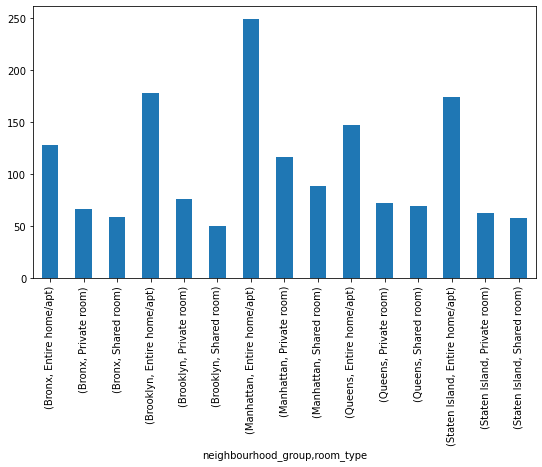

In [16]:
# Bar chart for each neighbourhood and average price
plt.rcParams['figure.figsize'] = (9,5)
avg_neighbourhood_room_type.plot.bar()

Text(0, 0.5, 'Price')

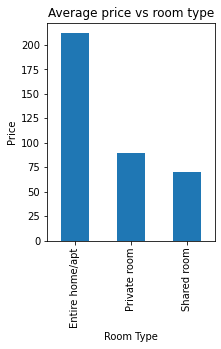

In [17]:
# Average price vs room type
plt.rcParams['figure.figsize'] = (3,4)
airbnb_df.groupby(['room_type'])['price'].mean().plot.bar()
plt.title('Average price vs room type')
plt.xlabel('Room Type')
plt.ylabel('Price')

Text(0.5, 0, 'Neighbourhood')

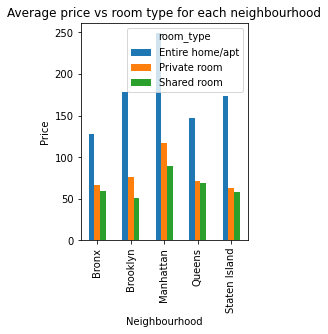

In [18]:
# Room type vs average price for each neighbourhood
airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().plot.bar()
plt.title('Average price vs room type for each neighbourhood')
plt.ylabel('Price')
plt.xlabel('Neighbourhood')

Text(0.5, 0, 'Room type')

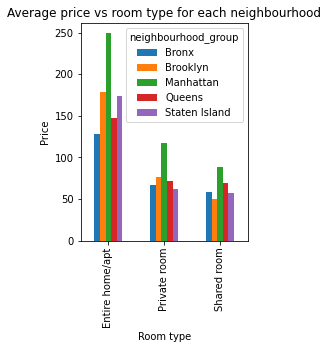

In [19]:
# Average price vs neighbourhood for each room type
airbnb_df.groupby(['room_type','neighbourhood_group'])['price'].mean().unstack().plot.bar()
plt.title('Average price vs room type for each neighbourhood')
plt.ylabel('Price')
plt.xlabel('Room type')

Text(0, 0.5, 'Sum of listings')

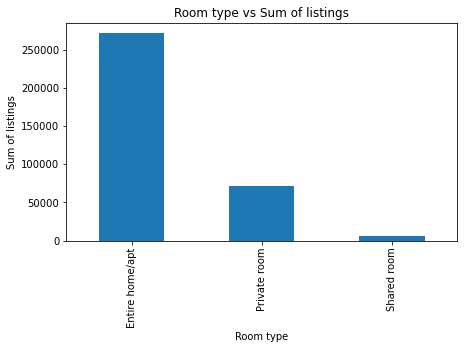

In [23]:
# Room type vs calculated_host_listings_count plot
airbnb_df.groupby('room_type')['calculated_host_listings_count'].sum().plot.bar()
plt.title('Room type vs Sum of listings')
plt.xlabel('Room type')
plt.ylabel('Sum of listings')

Text(0, 0.5, 'Sum of listings')

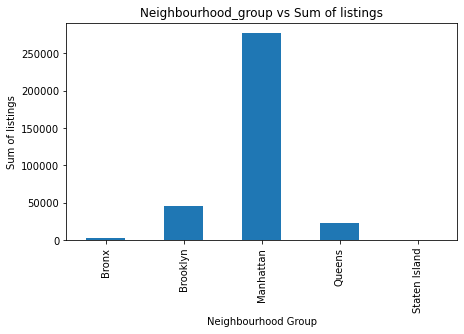

In [24]:
# neighbourhood_group vs calculated_host_listings_count
airbnb_df.groupby('neighbourhood_group')['calculated_host_listings_count'].sum().plot.bar()
plt.title('Neighbourhood_group vs Sum of listings')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Sum of listings')